In [89]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy
from scipy import stats

In [90]:
migVSmoney=pd.read_csv("FinalData/MigVsMoney_Cont_Reg31.csv")
migVSmoney.head()

,Recipient,Report Year,3yrAverage Money,3yrAverage Money per cap,Emigration per cap over all OECD,Emigration sum over all OECD countries,Continent,Region
0,Afghanistan,1996.0,8.471000e+07,18.218528,0.000716,12765.0,ASIA,SouthernAsia
1,Afghanistan,1997.0,1.530267e+08,15.158800,0.000715,13137.0,ASIA,SouthernAsia
2,Afghanistan,1998.0,2.553067e+08,14.351002,0.000645,12173.0,ASIA,SouthernAsia
3,Afghanistan,1999.0,2.446233e+08,13.321431,0.000613,11885.0,ASIA,SouthernAsia
4,Afghanistan,2000.0,2.410600e+08,12.825481,0.000824,16550.0,ASIA,SouthernAsia


In [91]:
uniquecontinents=migVSmoney.Continent.unique()
uniqueregions=migVSmoney.Region.unique()
print(uniquecontinents)
print(uniqueregions)

['ASIA' 'EUROPE' 'AFRICA' 'AMERICA' 'CARRIBEANS' 'OCEANIA']
['SouthernAsia' 'SouthernEurope' 'NorthernAfrica' 'MiddleAfrica'
 'SouthernAmerica' 'WesternAsia' 'EasternEurope' 'CentralAmerica'
 'WesternAfrica' 'SouthernAfrica' 'EasternAfrica' 'SouthernEastAsia'
 'Carribeans' 'EasternAsia' 'Oceania' 'CentralAsia']


In [92]:
migVSmoneyQ=migVSmoney.quantile([.05, .95])
migVSmoneyQ

,Report Year,3yrAverage Money,3yrAverage Money per cap,Emigration per cap over all OECD,Emigration sum over all OECD countries
0.05,1997.0,3.158933e+07,4.587187,0.000039,88.4
0.95,2015.0,2.357461e+09,383.765456,0.009564,77839.8


In [93]:
MigrationUPboundary=migVSmoneyQ.iloc[1][-2]
MigrationLOWboundary=migVSmoneyQ.iloc[0][-2]
MoneyUPboundary=migVSmoneyQ.iloc[1][1]
MoneyLOWboundary=migVSmoneyQ.iloc[0][1]
print(MigrationUPboundary,MigrationLOWboundary)
print(MoneyUPboundary,MoneyLOWboundary)

0.00956446459566 3.919324473e-05
2357460666.67 31589333.3333


In [94]:
df=migVSmoney
len(migVSmoney)
raw=df

In [95]:
migVSmoneyQ = migVSmoney[(migVSmoney.ix[:,2] > MoneyLOWboundary) & (migVSmoney.ix[:,2] < MoneyUPboundary) ]
df = migVSmoneyQ[(migVSmoneyQ.ix[:,4] > MigrationLOWboundary) & (migVSmoneyQ.ix[:,4] < MigrationUPboundary)]
len(df)

2072

In [96]:
# define the data/predictors as the pre-set feature names  
#df = pd.DataFrame(df, columns=["Average Sum of Money"])

# Put the target (housing value -- MEDV) in another DataFrame
#target = pd.DataFrame(df, columns=["Average of emigration over all OECD countries"])

In [97]:
raw=df

In [57]:
#Shapiro-Wilk
x = df.ix[:,2]
y = df.ix[:,4]

shapiro_results = scipy.stats.shapiro(x)

print(shapiro_results)
shapiro_results = scipy.stats.shapiro(y)

print(shapiro_results)

(0.817232608795166, 1.639519203260036e-43)
(0.7267627716064453, 0.0)


In [58]:
x = df.ix[:,2]
y = df.ix[:,4]

levene_results = scipy.stats.levene(x,y)

print(levene_results)


LeveneResult(statistic=6015.477636946056, pvalue=0.0)


In [60]:
import statsmodels.api as sm

X = df.ix[:,2]
Y = df.ix[:,4]

X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Emigration per cap over all OECD   R-squared:                       0.028
Model:                                          OLS   Adj. R-squared:                  0.028
Method:                               Least Squares   F-statistic:                     59.86
Date:                              Thu, 16 Nov 2017   Prob (F-statistic):           1.58e-14
Time:                                      21:42:33   Log-Likelihood:                 10002.
No. Observations:                              2072   AIC:                        -2.000e+04
Df Residuals:                                  2070   BIC:                        -1.999e+04
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0019   6.08e-05     30.736      0.000       0.002       0.002
3yrAverage Money -6.579e-13    8.5e-14     -7.737      0.000   -8.25e-13   -4.91e-13
==============================================================================
Omnibus:                      759.373   Durbin-Watson:                   0.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2285.102
Skew:                           1.917   Prob(JB):                         0.00
Kurtosis:                       6.431   Cond. No.                     1.02e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

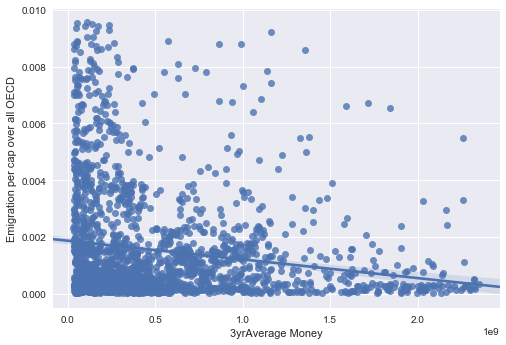

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x=df.ix[:,2], y=df.ix[:,4], data=df)
plt.show()

In [98]:
migVSmoney=pd.read_csv("FinalData/MigVsMoney_Cont_Reg31.csv")
migVSmoney.head()

,Recipient,Report Year,3yrAverage Money,3yrAverage Money per cap,Emigration per cap over all OECD,Emigration sum over all OECD countries,Continent,Region
0,Afghanistan,1996.0,8.471000e+07,18.218528,0.000716,12765.0,ASIA,SouthernAsia
1,Afghanistan,1997.0,1.530267e+08,15.158800,0.000715,13137.0,ASIA,SouthernAsia
2,Afghanistan,1998.0,2.553067e+08,14.351002,0.000645,12173.0,ASIA,SouthernAsia
3,Afghanistan,1999.0,2.446233e+08,13.321431,0.000613,11885.0,ASIA,SouthernAsia
4,Afghanistan,2000.0,2.410600e+08,12.825481,0.000824,16550.0,ASIA,SouthernAsia


In [102]:
uniquecontinents=migVSmoney.Continent.unique()
uniqueregions=migVSmoney.Region.unique()
uniquecountries=migVSmoney.Recipient.unique()

print(uniquecontinents)
print(uniqueregions)
print(len(uniquecountries))

['ASIA' 'EUROPE' 'AFRICA' 'AMERICA' 'CARRIBEANS' 'OCEANIA']
['SouthernAsia' 'SouthernEurope' 'NorthernAfrica' 'MiddleAfrica'
 'SouthernAmerica' 'WesternAsia' 'EasternEurope' 'CentralAmerica'
 'WesternAfrica' 'SouthernAfrica' 'EasternAfrica' 'SouthernEastAsia'
 'Carribeans' 'EasternAsia' 'Oceania' 'CentralAsia']
131


In [103]:
df=migVSmoney
len(migVSmoney)
raw=df
print(raw.head())

     Recipient  Report Year  3yrAverage Money  3yrAverage Money per cap  \
0  Afghanistan       1996.0      8.471000e+07                 18.218528   
1  Afghanistan       1997.0      1.530267e+08                 15.158800   
2  Afghanistan       1998.0      2.553067e+08                 14.351002   
3  Afghanistan       1999.0      2.446233e+08                 13.321431   
4  Afghanistan       2000.0      2.410600e+08                 12.825481   

   Emigration per cap over all OECD  Emigration sum over all OECD countries  \
0                          0.000716                                 12765.0   
1                          0.000715                                 13137.0   
2                          0.000645                                 12173.0   
3                          0.000613                                 11885.0   
4                          0.000824                                 16550.0   

  Continent        Region  
0      ASIA  SouthernAsia  
1      ASIA  South

In [104]:
region="SouthernAsia"

SouthernAsia
159
98
shapiro: (0.9196542501449585, 1.6226686057052575e-05)
shapiro: (0.8690463304519653, 8.115677729847448e-08)
LeveneResult(statistic=373.40753035520743, pvalue=4.3264866644752444e-47)
                                   OLS Regression Results                                   
Dep. Variable:     Emigration per cap over all OECD   R-squared:                       0.129
Model:                                          OLS   Adj. R-squared:                  0.120
Method:                               Least Squares   F-statistic:                     14.24
Date:                              Fri, 17 Nov 2017   Prob (F-statistic):           0.000279
Time:                                      09:29:53   Log-Likelihood:                 641.90
No. Observations:                                98   AIC:                            -1280.
Df Residuals:                                    96   BIC:                            -1275.
Df Model:                                         1    

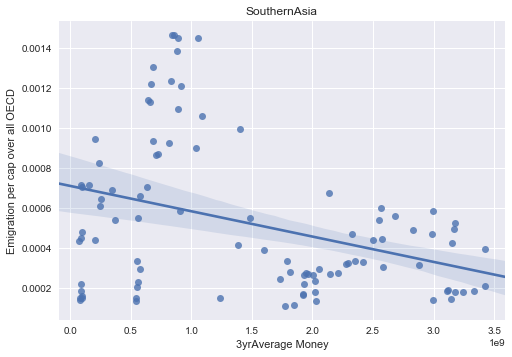

SouthernEurope
104
65
shapiro: (0.8713861703872681, 6.797723017371027e-06)
shapiro: (0.9228493571281433, 0.0005900591495446861)
LeveneResult(statistic=92.851799310081105, pvalue=7.4153015995567983e-17)
                                   OLS Regression Results                                   
Dep. Variable:     Emigration per cap over all OECD   R-squared:                       0.018
Model:                                          OLS   Adj. R-squared:                  0.002
Method:                               Least Squares   F-statistic:                     1.159
Date:                              Fri, 17 Nov 2017   Prob (F-statistic):              0.286
Time:                                      09:29:54   Log-Likelihood:                 294.92
No. Observations:                                65   AIC:                            -585.8
Df Residuals:                                    63   BIC:                            -581.5
Df Model:                                         1   

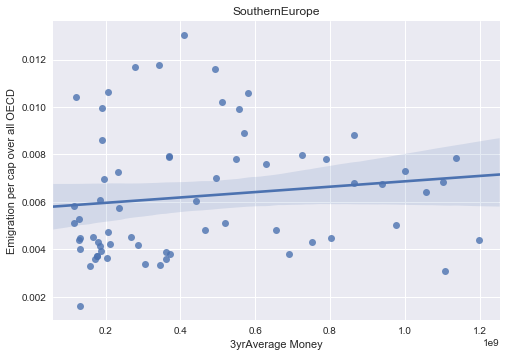

NorthernAfrica
113
68
shapiro: (0.8088732957839966, 5.767804012180022e-08)
shapiro: (0.9008668661117554, 5.320659329299815e-05)
LeveneResult(statistic=59.976145041104488, pvalue=2.1012561429029213e-12)
                                   OLS Regression Results                                   
Dep. Variable:     Emigration per cap over all OECD   R-squared:                       0.050
Model:                                          OLS   Adj. R-squared:                  0.036
Method:                               Least Squares   F-statistic:                     3.470
Date:                              Fri, 17 Nov 2017   Prob (F-statistic):             0.0669
Time:                                      09:29:55   Log-Likelihood:                 394.45
No. Observations:                                68   AIC:                            -784.9
Df Residuals:                                    66   BIC:                            -780.5
Df Model:                                         1   

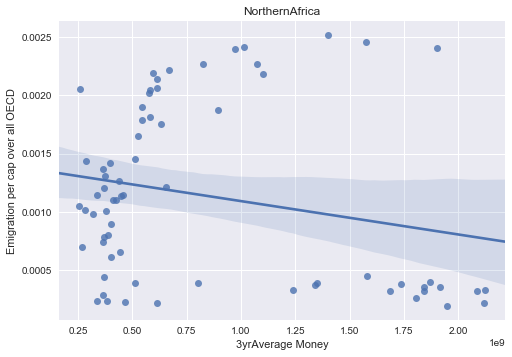

MiddleAfrica
180
112
shapiro: (0.8862076997756958, 9.325665217829737e-08)
shapiro: (0.8439009189605713, 1.6303660643757212e-09)
LeveneResult(statistic=160.20536638297713, pvalue=5.3048751409437045e-28)
                                   OLS Regression Results                                   
Dep. Variable:     Emigration per cap over all OECD   R-squared:                       0.005
Model:                                          OLS   Adj. R-squared:                 -0.004
Method:                               Least Squares   F-statistic:                    0.6032
Date:                              Fri, 17 Nov 2017   Prob (F-statistic):              0.439
Time:                                      09:29:55   Log-Likelihood:                 702.27
No. Observations:                               112   AIC:                            -1401.
Df Residuals:                                   110   BIC:                            -1395.
Df Model:                                         1   

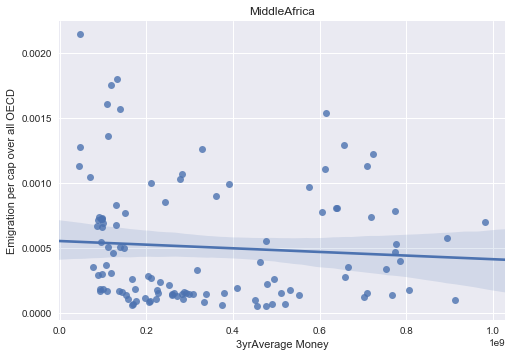

SouthernAmerica
200
124
shapiro: (0.9096318483352661, 4.406352047681139e-07)
shapiro: (0.8006986379623413, 1.1039924183164906e-11)
LeveneResult(statistic=256.40425172611236, pvalue=5.0803354867123629e-40)
                                   OLS Regression Results                                   
Dep. Variable:     Emigration per cap over all OECD   R-squared:                       0.003
Model:                                          OLS   Adj. R-squared:                 -0.005
Method:                               Least Squares   F-statistic:                    0.3819
Date:                              Fri, 17 Nov 2017   Prob (F-statistic):              0.538
Time:                                      09:29:56   Log-Likelihood:                 605.19
No. Observations:                               124   AIC:                            -1206.
Df Residuals:                                   122   BIC:                            -1201.
Df Model:                                         1

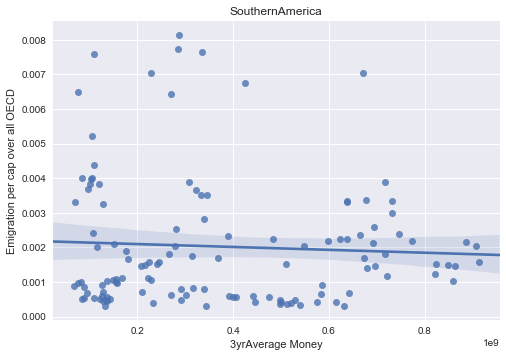

WesternAsia
180
113
shapiro: (0.8650399446487427, 9.971336645264728e-09)
shapiro: (0.9235409498214722, 7.0096775743877515e-06)
LeveneResult(statistic=122.61133812888733, pvalue=5.1752662364789701e-23)
                                   OLS Regression Results                                   
Dep. Variable:     Emigration per cap over all OECD   R-squared:                       0.001
Model:                                          OLS   Adj. R-squared:                 -0.008
Method:                               Least Squares   F-statistic:                   0.08994
Date:                              Fri, 17 Nov 2017   Prob (F-statistic):              0.765
Time:                                      09:29:56   Log-Likelihood:                 634.46
No. Observations:                               113   AIC:                            -1265.
Df Residuals:                                   111   BIC:                            -1259.
Df Model:                                         1    

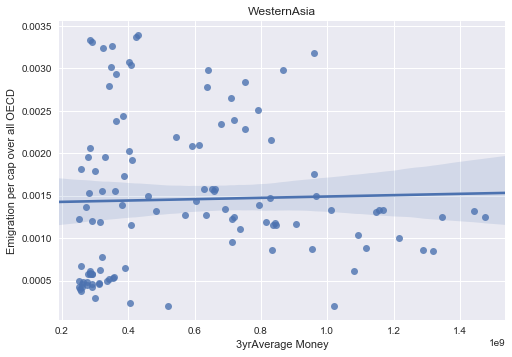

EasternEurope
32
18
shapiro: (0.910190999507904, 0.0867031067609787)
shapiro: (0.9170053005218506, 0.11441124230623245)
LeveneResult(statistic=46.565069916257109, pvalue=7.4864146653533672e-08)
                                   OLS Regression Results                                   
Dep. Variable:     Emigration per cap over all OECD   R-squared:                       0.385
Model:                                          OLS   Adj. R-squared:                  0.347
Method:                               Least Squares   F-statistic:                     10.02
Date:                              Fri, 17 Nov 2017   Prob (F-statistic):            0.00600
Time:                                      09:29:57   Log-Likelihood:                 94.698
No. Observations:                                18   AIC:                            -185.4
Df Residuals:                                    16   BIC:                            -183.6
Df Model:                                         1           

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


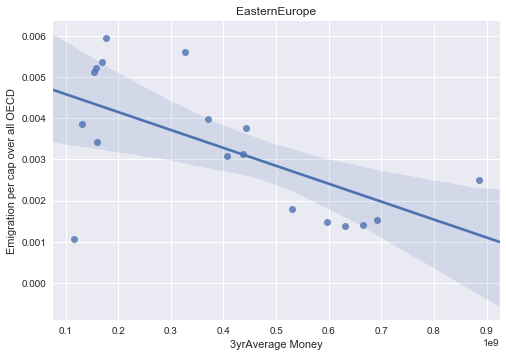

CentralAmerica
159
100
shapiro: (0.9333308339118958, 7.72970961406827e-05)
shapiro: (0.7965695858001709, 1.945414107584753e-10)
LeveneResult(statistic=170.44399940980725, pvalue=1.6483264218006958e-28)
                                   OLS Regression Results                                   
Dep. Variable:     Emigration per cap over all OECD   R-squared:                       0.010
Model:                                          OLS   Adj. R-squared:                  0.000
Method:                               Least Squares   F-statistic:                     1.010
Date:                              Fri, 17 Nov 2017   Prob (F-statistic):              0.317
Time:                                      09:29:57   Log-Likelihood:                 571.64
No. Observations:                               100   AIC:                            -1139.
Df Residuals:                                    98   BIC:                            -1134.
Df Model:                                         1   

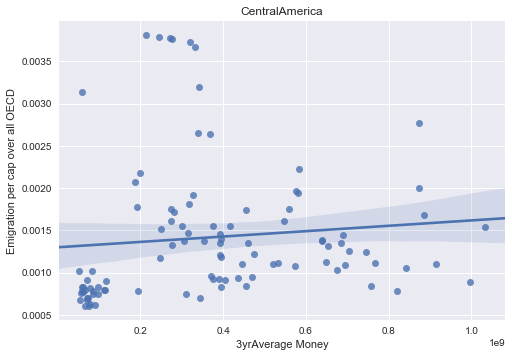

WesternAfrica
300
185
shapiro: (0.9352818727493286, 2.312201416998505e-07)
shapiro: (0.8689708113670349, 1.389483927222157e-11)
LeveneResult(statistic=293.68794698584367, pvalue=8.1180463454983215e-49)
                                   OLS Regression Results                                   
Dep. Variable:     Emigration per cap over all OECD   R-squared:                       0.003
Model:                                          OLS   Adj. R-squared:                 -0.003
Method:                               Least Squares   F-statistic:                    0.5298
Date:                              Fri, 17 Nov 2017   Prob (F-statistic):              0.468
Time:                                      09:29:58   Log-Likelihood:                 1144.0
No. Observations:                               185   AIC:                            -2284.
Df Residuals:                                   183   BIC:                            -2277.
Df Model:                                         1   

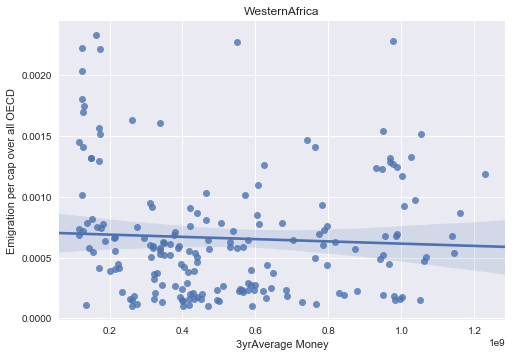

SouthernAfrica
99
61
shapiro: (0.7767065167427063, 3.074021748261657e-08)
shapiro: (0.7822583317756653, 4.158327726599964e-08)
LeveneResult(statistic=46.660533013558606, pvalue=3.7159636820081982e-10)
                                   OLS Regression Results                                   
Dep. Variable:     Emigration per cap over all OECD   R-squared:                       0.504
Model:                                          OLS   Adj. R-squared:                  0.496
Method:                               Least Squares   F-statistic:                     59.98
Date:                              Fri, 17 Nov 2017   Prob (F-statistic):           1.48e-10
Time:                                      09:29:58   Log-Likelihood:                 473.37
No. Observations:                                61   AIC:                            -942.7
Df Residuals:                                    59   BIC:                            -938.5
Df Model:                                         1    

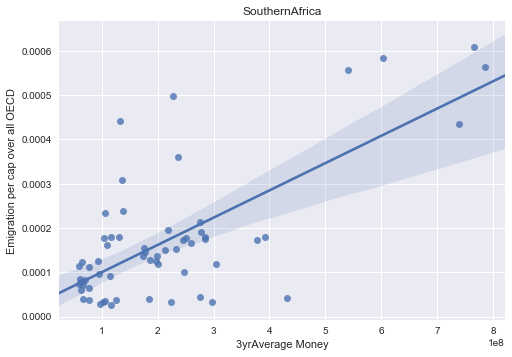

EasternAfrica
339
213
shapiro: (0.9188303351402283, 2.0114581111840835e-09)
shapiro: (0.6873160600662231, 1.1688081442419888e-19)
LeveneResult(statistic=335.54883194229149, pvalue=1.2242647993035456e-55)
                                   OLS Regression Results                                   
Dep. Variable:     Emigration per cap over all OECD   R-squared:                       0.203
Model:                                          OLS   Adj. R-squared:                  0.200
Method:                               Least Squares   F-statistic:                     53.91
Date:                              Fri, 17 Nov 2017   Prob (F-statistic):           4.50e-12
Time:                                      09:29:59   Log-Likelihood:                 1367.8
No. Observations:                               213   AIC:                            -2732.
Df Residuals:                                   211   BIC:                            -2725.
Df Model:                                         1 

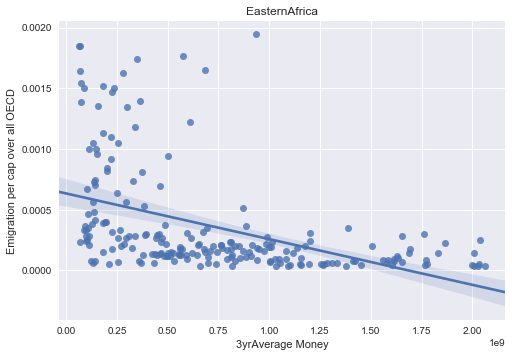

SouthernEastAsia
178
119
shapiro: (0.7749311923980713, 3.1844251627971554e-12)
shapiro: (0.9436046481132507, 8.104720473056659e-05)
LeveneResult(statistic=75.982440254522373, pvalue=5.1581714739406682e-16)
                                   OLS Regression Results                                   
Dep. Variable:     Emigration per cap over all OECD   R-squared:                       0.000
Model:                                          OLS   Adj. R-squared:                 -0.009
Method:                               Least Squares   F-statistic:                 0.0006851
Date:                              Fri, 17 Nov 2017   Prob (F-statistic):              0.979
Time:                                      09:29:59   Log-Likelihood:                 794.19
No. Observations:                               119   AIC:                            -1584.
Df Residuals:                                   117   BIC:                            -1579.
Df Model:                                         

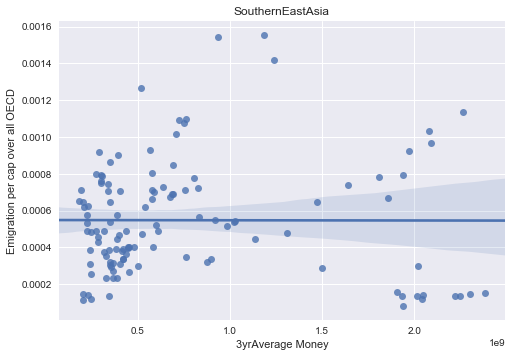

Carribeans
158
102
shapiro: (0.8474879860877991, 7.476671726180939e-09)
shapiro: (0.9642607569694519, 0.007348458282649517)
LeveneResult(statistic=146.92072867573387, pvalue=9.0939681532584364e-26)
                                   OLS Regression Results                                   
Dep. Variable:     Emigration per cap over all OECD   R-squared:                       0.229
Model:                                          OLS   Adj. R-squared:                  0.222
Method:                               Least Squares   F-statistic:                     29.77
Date:                              Fri, 17 Nov 2017   Prob (F-statistic):           3.54e-07
Time:                                      09:30:00   Log-Likelihood:                 497.02
No. Observations:                               102   AIC:                            -990.0
Df Residuals:                                   100   BIC:                            -984.8
Df Model:                                         1       

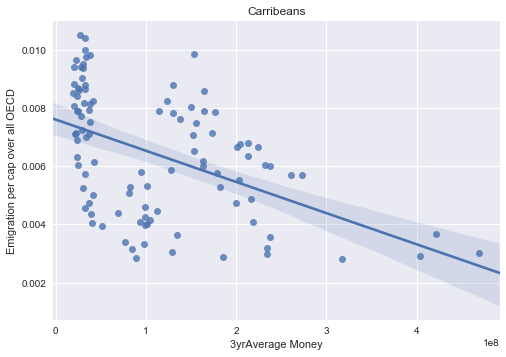

EasternAsia
40
26
shapiro: (0.9363834261894226, 0.11006370931863785)
shapiro: (0.764392077922821, 4.6275610657176e-05)
LeveneResult(statistic=33.33375079112632, pvalue=4.9115494696076829e-07)
                                   OLS Regression Results                                   
Dep. Variable:     Emigration per cap over all OECD   R-squared:                       0.379
Model:                                          OLS   Adj. R-squared:                  0.353
Method:                               Least Squares   F-statistic:                     14.64
Date:                              Fri, 17 Nov 2017   Prob (F-statistic):           0.000818
Time:                                      09:30:00   Log-Likelihood:                 139.06
No. Observations:                                26   AIC:                            -274.1
Df Residuals:                                    24   BIC:                            -271.6
Df Model:                                         1             

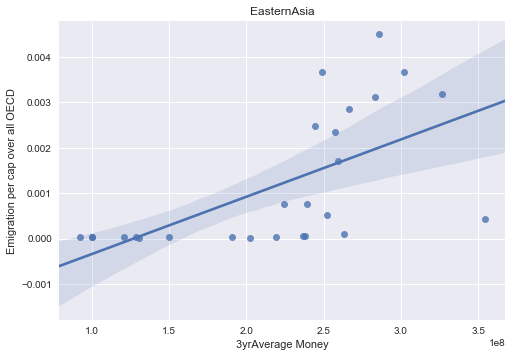

Oceania
208
142
shapiro: (0.728032648563385, 6.634210647065699e-15)
shapiro: (0.8303770422935486, 1.6115163023466827e-11)
LeveneResult(statistic=69.19885679506568, pvalue=3.8483222737398252e-15)
                                   OLS Regression Results                                   
Dep. Variable:     Emigration per cap over all OECD   R-squared:                       0.130
Model:                                          OLS   Adj. R-squared:                  0.123
Method:                               Least Squares   F-statistic:                     20.86
Date:                              Fri, 17 Nov 2017   Prob (F-statistic):           1.07e-05
Time:                                      09:30:01   Log-Likelihood:                 592.90
No. Observations:                               142   AIC:                            -1182.
Df Residuals:                                   140   BIC:                            -1176.
Df Model:                                         1          

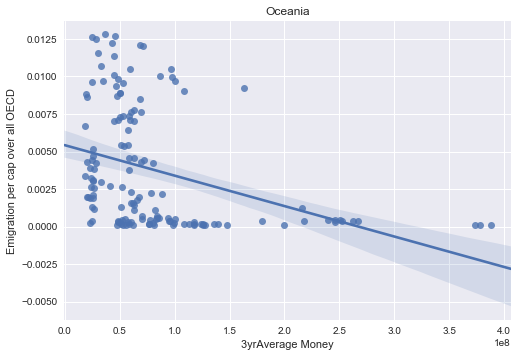

CentralAsia
100
66
shapiro: (0.9666709899902344, 0.0729614868760109)
shapiro: (0.9013026356697083, 7.033146539470181e-05)
LeveneResult(statistic=112.74232499909048, pvalue=2.3922514388857123e-19)
                                   OLS Regression Results                                   
Dep. Variable:     Emigration per cap over all OECD   R-squared:                       0.140
Model:                                          OLS   Adj. R-squared:                  0.127
Method:                               Least Squares   F-statistic:                     10.44
Date:                              Fri, 17 Nov 2017   Prob (F-statistic):            0.00195
Time:                                      09:30:01   Log-Likelihood:                 472.25
No. Observations:                                66   AIC:                            -940.5
Df Residuals:                                    64   BIC:                            -936.1
Df Model:                                         1         

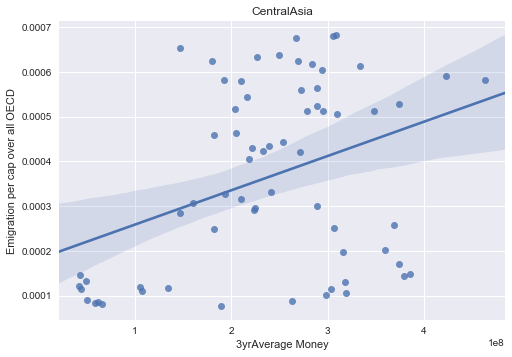

In [122]:
#migVSmoney=migVSmoney[migVSmoney["Report Year"]==2007.0]
for i in uniqueregions:
    region=i
    print(region)
    df=raw[raw["Region"]==region]
    print(len(df))
    migVSmoneyQ=df.quantile([.1, 0.9])
    MigrationUPboundary=migVSmoneyQ.iloc[1][-2]
    MigrationLOWboundary=migVSmoneyQ.iloc[0][-2]
    MoneyUPboundary=migVSmoneyQ.iloc[1][1]
    MoneyLOWboundary=migVSmoneyQ.iloc[0][1]
    df = df[(df.ix[:,2] > MoneyLOWboundary) & (df.ix[:,2] < MoneyUPboundary) ]
    df = df[(df.ix[:,4] > MigrationLOWboundary) & (df.ix[:,4] < MigrationUPboundary)]
    print(len(df))

    x = df.ix[:,2]
    y = df.ix[:,4]

    shapiro_results = scipy.stats.shapiro(x)

    print("shapiro:",shapiro_results)
    shapiro_results = scipy.stats.shapiro(y)
    print("shapiro:",shapiro_results)

    x = df.ix[:,2]
    y = df.ix[:,4]

    levene_results = scipy.stats.levene(x,y)

    print(levene_results)
    X = df.ix[:,2]
    Y = df.ix[:,4]

    X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

    # Note the difference in argument order
    model = sm.OLS(Y, X).fit()
    predictions = model.predict(X) # make the predictions by the model

    # Print out the statistics
    print(model.summary())
    sns.regplot(x=df.ix[:,2], y=df.ix[:,4], data=df)
    plt.title(region)
    plt.savefig(region+'.png')

    plt.show()

ASIA
657
530
shapiro: (0.781121551990509, 4.911757993589868e-26)
shapiro: (0.825005292892456, 1.2792835815389744e-23)
LeveneResult(statistic=340.69136708952595, pvalue=3.6395518404054307e-66)
                                   OLS Regression Results                                   
Dep. Variable:     Emigration per cap over all OECD   R-squared:                       0.015
Model:                                          OLS   Adj. R-squared:                  0.013
Method:                               Least Squares   F-statistic:                     7.854
Date:                              Fri, 17 Nov 2017   Prob (F-statistic):            0.00526
Time:                                      09:07:50   Log-Likelihood:                 3073.1
No. Observations:                               530   AIC:                            -6142.
Df Residuals:                                   528   BIC:                            -6134.
Df Model:                                         1             

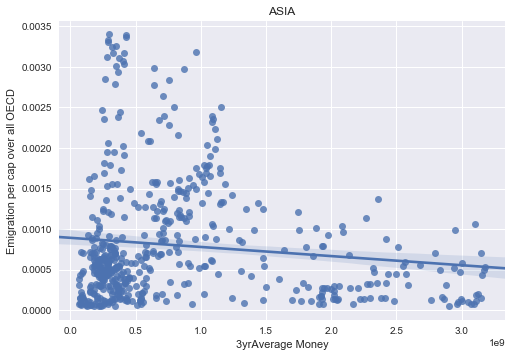

EUROPE
136
112
shapiro: (0.8465436697006226, 2.053938574775316e-09)
shapiro: (0.9387213587760925, 6.387459143297747e-05)
LeveneResult(statistic=131.60745451189376, pvalue=3.1549083876105099e-24)
                                   OLS Regression Results                                   
Dep. Variable:     Emigration per cap over all OECD   R-squared:                       0.010
Model:                                          OLS   Adj. R-squared:                  0.001
Method:                               Least Squares   F-statistic:                     1.162
Date:                              Fri, 17 Nov 2017   Prob (F-statistic):              0.283
Time:                                      09:07:51   Log-Likelihood:                 472.07
No. Observations:                               112   AIC:                            -940.1
Df Residuals:                                   110   BIC:                            -934.7
Df Model:                                         1          

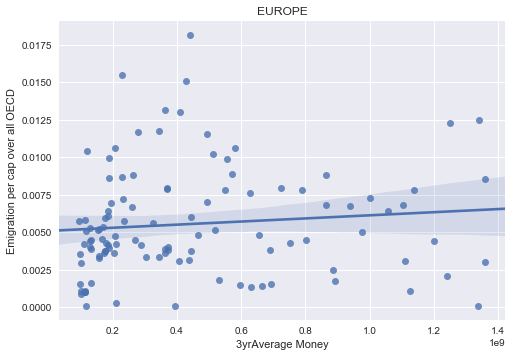

AFRICA
1031
833
shapiro: (0.8555551767349243, 6.2705120464139604e-27)
shapiro: (0.7577517032623291, 3.189512535782284e-33)
LeveneResult(statistic=826.30367400896455, pvalue=7.0465024400187605e-148)
                                   OLS Regression Results                                   
Dep. Variable:     Emigration per cap over all OECD   R-squared:                       0.027
Model:                                          OLS   Adj. R-squared:                  0.026
Method:                               Least Squares   F-statistic:                     22.79
Date:                              Fri, 17 Nov 2017   Prob (F-statistic):           2.13e-06
Time:                                      09:07:51   Log-Likelihood:                 4799.5
No. Observations:                               833   AIC:                            -9595.
Df Residuals:                                   831   BIC:                            -9586.
Df Model:                                         1       

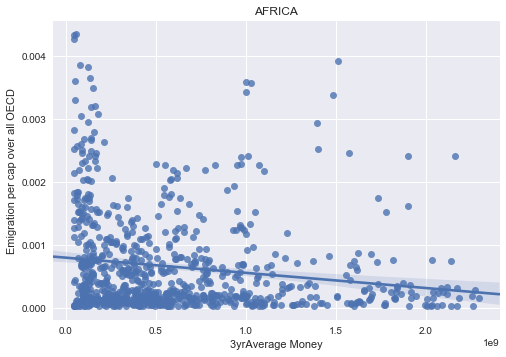

AMERICA
359
289
shapiro: (0.9021625518798828, 9.703170341865408e-13)
shapiro: (0.7872875928878784, 4.057496421958827e-19)
LeveneResult(statistic=462.79187356591592, pvalue=8.6623597746255077e-76)
                                   OLS Regression Results                                   
Dep. Variable:     Emigration per cap over all OECD   R-squared:                       0.005
Model:                                          OLS   Adj. R-squared:                  0.001
Method:                               Least Squares   F-statistic:                     1.301
Date:                              Fri, 17 Nov 2017   Prob (F-statistic):              0.255
Time:                                      09:07:52   Log-Likelihood:                 1440.2
No. Observations:                               289   AIC:                            -2876.
Df Residuals:                                   287   BIC:                            -2869.
Df Model:                                         1         

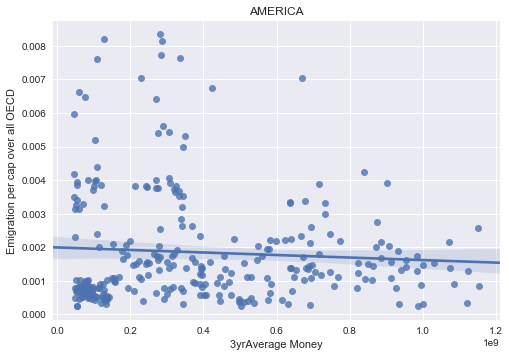

CARRIBEANS
158
126
shapiro: (0.736315131187439, 9.435926025995814e-14)
shapiro: (0.9611945748329163, 0.0011355807073414326)
LeveneResult(statistic=85.600497175779907, pvalue=1.0209142208440347e-17)
                                   OLS Regression Results                                   
Dep. Variable:     Emigration per cap over all OECD   R-squared:                       0.169
Model:                                          OLS   Adj. R-squared:                  0.162
Method:                               Least Squares   F-statistic:                     25.17
Date:                              Fri, 17 Nov 2017   Prob (F-statistic):           1.78e-06
Time:                                      09:07:53   Log-Likelihood:                 588.97
No. Observations:                               126   AIC:                            -1174.
Df Residuals:                                   124   BIC:                            -1168.
Df Model:                                         1       

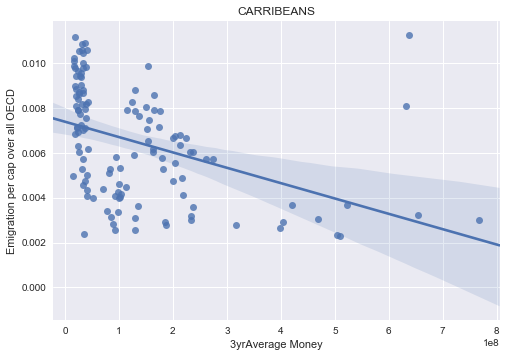

OCEANIA
208
169
shapiro: (0.6761444807052612, 8.498767114821964e-18)
shapiro: (0.8202546834945679, 3.760048099699792e-13)
LeveneResult(statistic=67.700113347289374, pvalue=4.2377034641833542e-15)
                                   OLS Regression Results                                   
Dep. Variable:     Emigration per cap over all OECD   R-squared:                       0.170
Model:                                          OLS   Adj. R-squared:                  0.165
Method:                               Least Squares   F-statistic:                     34.18
Date:                              Fri, 17 Nov 2017   Prob (F-statistic):           2.57e-08
Time:                                      09:07:53   Log-Likelihood:                 689.32
No. Observations:                               169   AIC:                            -1375.
Df Residuals:                                   167   BIC:                            -1368.
Df Model:                                         1         

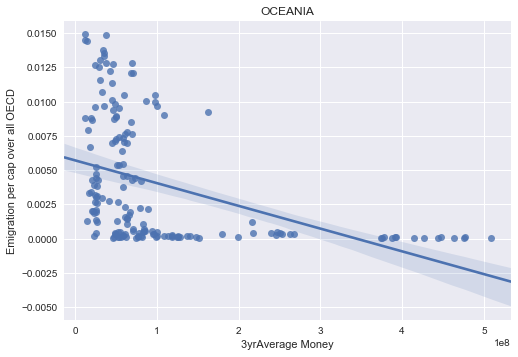

In [116]:
#migVSmoney=migVSmoney[migVSmoney["Report Year"]==2007.0]
for i in uniquecontinents:
    continent=i
    print(continent)
    df=raw[raw["Continent"]==continent]
    print(len(df))
    migVSmoneyQ=df.quantile([.05, .95])
    MigrationUPboundary=migVSmoneyQ.iloc[1][-2]
    MigrationLOWboundary=migVSmoneyQ.iloc[0][-2]
    MoneyUPboundary=migVSmoneyQ.iloc[1][1]
    MoneyLOWboundary=migVSmoneyQ.iloc[0][1]
    df = df[(df.ix[:,2] > MoneyLOWboundary) & (df.ix[:,2] < MoneyUPboundary) ]
    df = df[(df.ix[:,4] > MigrationLOWboundary) & (df.ix[:,4] < MigrationUPboundary)]
    print(len(df))

    x = df.ix[:,2]
    y = df.ix[:,4]

    shapiro_results = scipy.stats.shapiro(x)

    print("shapiro:",shapiro_results)
    shapiro_results = scipy.stats.shapiro(y)
    print("shapiro:",shapiro_results)

    x = df.ix[:,2]
    y = df.ix[:,4]

    levene_results = scipy.stats.levene(x,y)

    print(levene_results)
    X = df.ix[:,2]
    Y = df.ix[:,4]

    X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

    # Note the difference in argument order
    model = sm.OLS(Y, X).fit()
    predictions = model.predict(X) # make the predictions by the model

    # Print out the statistics
    print(model.summary())
    sns.regplot(x=df.ix[:,2], y=df.ix[:,4], data=df)
    plt.title(continent)

    plt.show()

20
20
shapiro: (0.8180140256881714, 0.0016242744168266654)
shapiro: (0.9466397166252136, 0.318943053483963)
LeveneResult(statistic=15.067072850780169, pvalue=0.00040054591290443817)
                                   OLS Regression Results                                   
Dep. Variable:     Emigration per cap over all OECD   R-squared:                       0.290
Model:                                          OLS   Adj. R-squared:                  0.251
Method:                               Least Squares   F-statistic:                     7.351
Date:                              Fri, 17 Nov 2017   Prob (F-statistic):             0.0143
Time:                                      14:47:02   Log-Likelihood:                 139.95
No. Observations:                                20   AIC:                            -275.9
Df Residuals:                                    18   BIC:                            -273.9
Df Model:                                         1                       

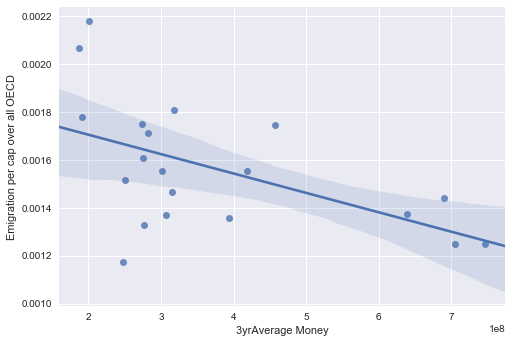

In [153]:
df=raw[raw["Recipient"]=="Mexico"]
print(len(df))
#migVSmoneyQ=df.quantile([.1, .9])
MigrationUPboundary=migVSmoneyQ.iloc[1][-2]
MigrationLOWboundary=migVSmoneyQ.iloc[0][-2]
MoneyUPboundary=migVSmoneyQ.iloc[1][1]
MoneyLOWboundary=migVSmoneyQ.iloc[0][1]
#df = df[(df.ix[:,2] > MoneyLOWboundary) & (df.ix[:,2] < MoneyUPboundary) ]
#df = df[(df.ix[:,4] > MigrationLOWboundary) & (df.ix[:,4] < MigrationUPboundary)]
print(len(df))

x = df.ix[:,2]
y = df.ix[:,4]

shapiro_results = scipy.stats.shapiro(x)

print("shapiro:",shapiro_results)
shapiro_results = scipy.stats.shapiro(y)
print("shapiro:",shapiro_results)

x = df.ix[:,2]
y = df.ix[:,4]

levene_results = scipy.stats.levene(x,y)

print(levene_results)
X = df.ix[:,2]
Y = df.ix[:,4]

X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
print(model.summary())
sns.regplot(x=df.ix[:,2], y=df.ix[:,4], data=df)
#plt.title(continent)

plt.show()

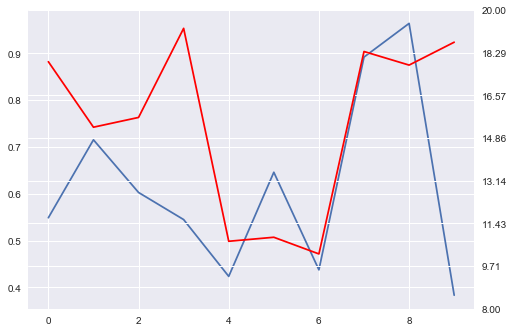

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

np.random.seed(0)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(pd.Series(np.random.uniform(0,1,size=10)))
ax2 = ax1.twinx()
ax2.plot(pd.Series(np.random.uniform(10,20,size=10)),color='r')
ax2.set_yticks(np.linspace(ax2.get_yticks()[0],ax2.get_yticks()[-1],len(ax1.get_yticks())))

# ADD THIS LINE
#

plt.show()